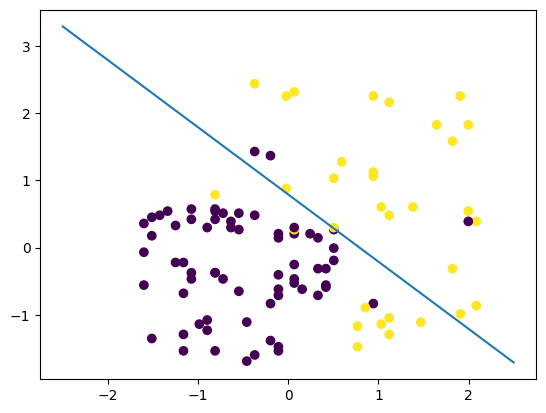

In [5]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Social_Network_Ads.csv')
x = data.iloc[:,[2,3]]
y = data.iloc[:,4]

x_train,x_test,y_train,y_test = train_test_split(x, y ,test_size=0.25,random_state=0)

sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

lin = SVC(kernel='linear',random_state=0).fit(x_train,y_train)
pred = lin.predict(x_test)

plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
w = lin.coef_[0]
a = -w[0] / w[0]
xx = np.linspace(-2.5,2.5)
yy = a*xx -(lin.intercept_[0]) / w[1]
plt.plot(xx,yy)
plt.show()

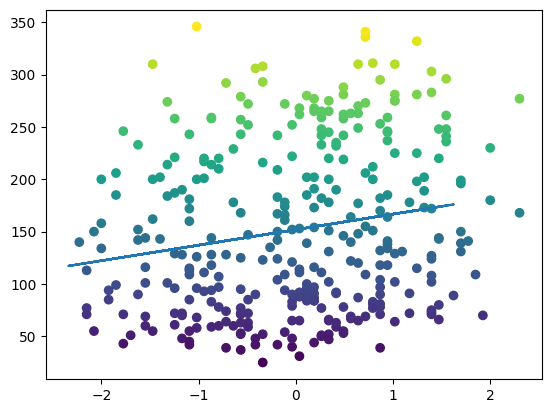

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = load_diabetes()
x = data.data[:,[0]]
y = data.target
x_train,x_test,y_train,y_test = train_test_split(x, y ,test_size=0.25,random_state=0)

sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

lin = LinearRegression()
lin.fit(x_train,y_train)
pred_test = lin.predict(x_test)
pred_train = lin.predict(x_train)

plt.scatter(x_train,y_train,c=y_train)
plt.plot(x_test,pred_test)
plt.show()

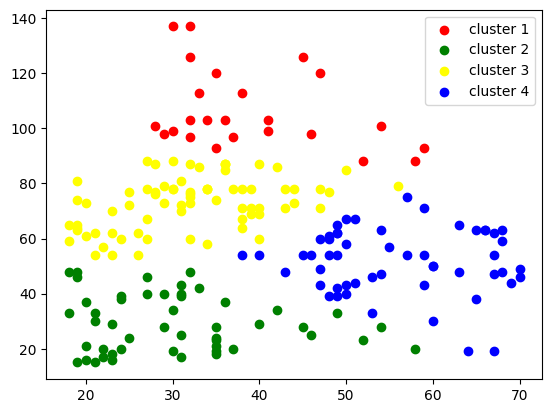

In [19]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Mall_Customers.csv')
x = data.iloc[:,[2,3]].values

km = KMeans(n_clusters = 4 , random_state=45 , n_init=10)
km.fit(x)
pred = km.predict(x)

plt.scatter(x[pred == 0,0],x[pred == 0,1],c='red',label='cluster 1')
plt.scatter(x[pred == 1,0],x[pred == 1,1],c='green',label='cluster 2')
plt.scatter(x[pred == 2,0],x[pred == 2,1],c='yellow',label='cluster 3')
plt.scatter(x[pred == 3,0],x[pred == 3,1],c='blue',label='cluster 4')
plt.legend()
plt.show()


Accuracy of Classifier 1 : 0.9736842105263158
Accuracy of Classifier 2 : 0.9736842105263158
Accuracy of Classifier 3 : 0.9736842105263158
confusion matrix of Classifier 1 :
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
confusion matrix of Classifier 2 :
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
confusion matrix of Classifier 3 :
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



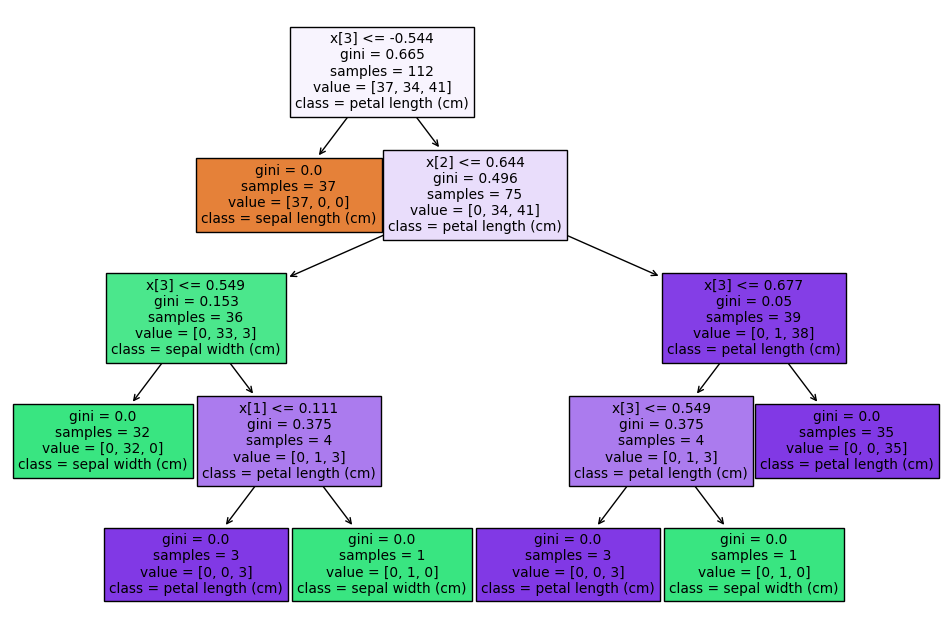

In [62]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

data = load_iris()
x = data.data
y = data.target

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 ,random_state=0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

c1 = DecisionTreeClassifier()
c2 = DecisionTreeClassifier(criterion = 'entropy')
c3 = DecisionTreeClassifier(criterion='entropy',random_state=45)

c1.fit(x_train,y_train)
c2.fit(x_train,y_train)
c3.fit(x_train,y_train)

pred1 = c1.predict(x_test)
pred2 = c2.predict(x_test)
pred3 = c3.predict(x_test)

print('Accuracy of Classifier 1 :',accuracy_score(y_test,pred1))
print('Accuracy of Classifier 2 :',accuracy_score(y_test,pred2))
print('Accuracy of Classifier 3 :',accuracy_score(y_test,pred3))

print('confusion matrix of Classifier 1 :\n',confusion_matrix(y_test,pred1))
print('confusion matrix of Classifier 2 :\n',confusion_matrix(y_test,pred2))
print('confusion matrix of Classifier 3 :\n',confusion_matrix(y_test,pred3))

print('classification report',classification_report(y_test,pred1))

plt.figure(figsize=(12,8))
plot_tree(c1 , filled=True,class_names=data.feature_names)
plt.show()

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
import pandas as pd

data = pd.read_csv('Social_Network_Ads.csv')
x = data.iloc[:,[2,3]]
y = data.iloc[:,4]

x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.25 ,random_state=0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

kn = KNeighborsClassifier(n_neighbors=4)
kn.fit(x_train,y_train)
pred = kn.predict(x_test)

print('Accuracy Score :',accuracy_score(pred,y_test))
print('\nConfusion Matrix :\n',confusion_matrix(pred,y_test))
print('\nClassification Report :\n',classification_report(pred,y_test))

Accuracy Score : 0.93

Confusion Matrix :
 [[64  3]
 [ 4 29]]

Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.91      0.88      0.89        33

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [84]:
from sklearn.naive_bayes import GaussianNB , BernoulliNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.model_selection import train_test_split

data = load_iris()
x = data.data
y = data.target

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

gu = GaussianNB().fit(x_train,y_train)
pred = gu.predict(x_test)

be = BernoulliNB().fit(x_train,y_train)
pred_be = be.predict(x_test)

print("Accuracy Score using Gaussian Nave bayes",accuracy_score(pred , y_test))
print("Accuracy Score using Bernoulli Nave bayes",accuracy_score(pred_be , y_test))

print("confution matrix using Gaussian Nave bayes\n",confusion_matrix(pred , y_test))
print("confusion matrix using Bernoulli Nave bayes\n",confusion_matrix(pred_be , y_test))

print("classification report using Gaussian Nave bayes\n",classification_report(pred , y_test))
print("classification report Bernoulli Nave bayes\n",classification_report(pred_be , y_test))

Accuracy Score using Gaussian Nave bayes 0.868421052631579
Accuracy Score using Bernoulli Nave bayes 0.6842105263157895
confution matrix using Gaussian Nave bayes
 [[13  0  0]
 [ 0 11  0]
 [ 0  5  9]]
confusion matrix using Bernoulli Nave bayes
 [[13  1  0]
 [ 0  5  1]
 [ 0 10  8]]
classification report using Gaussian Nave bayes
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.69      1.00      0.81        11
           2       1.00      0.64      0.78        14

    accuracy                           0.87        38
   macro avg       0.90      0.88      0.87        38
weighted avg       0.91      0.87      0.87        38

classification report Bernoulli Nave bayes
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.31      0.83      0.45         6
           2       0.89      0.44      0.59        18

    accuracy             